# Telecom Churn Case Study

1. Data Reading and Understanding.
2. Data Cleaning and EDA
3. Data Preprocessing.
4. Modeling.
5. Recommendations.

## 1.Data Reading and Understanding

In [1]:
#importing libraries
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
df.shape

(99999, 226)

In [5]:
df.describe(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


## 2.Data Cleaning & Exploratory Data Analysis

### Missing Value Treatment

In [6]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(20)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
dtype: float64

- <b>Dropping columns with more than 70% missing value.

# Replace with 0 ?

In [7]:
df.dropna(thresh=df.shape[0]*0.7,axis=1,inplace=True)

- <b> Filling rest of the categorical & numerical columns with mode & median respectively.

In [8]:
#categorical columns
cat_col = df.select_dtypes(include='object').columns

df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [9]:
df[cat_col].isna().sum()

last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
date_of_last_rech_6     0
date_of_last_rech_7     0
date_of_last_rech_8     0
date_of_last_rech_9     0
dtype: int64

In [10]:
#numericals
df = df.fillna(df.median().iloc[0])

In [11]:
# true=((df.isnull().sum()/len(df)*100).sort_values(ascending=False)>1)
# num_missing = true.loc[true.values==True].index
# df[num_missing].describe()

In [12]:
df.isna().sum().sort_values(ascending=False).head()

sep_vbc_3g          0
std_og_t2f_mou_7    0
std_og_mou_8        0
std_og_mou_7        0
std_og_mou_6        0
dtype: int64

### Filtering High Value Customers 

In [13]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] +df['total_rech_amt_7']) / 2
df.avg_rech_amt_6_7

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [14]:
bottom_70 = df.avg_rech_amt_6_7.quantile(.7)

- <b> Retaining only the top 30% of customers.

In [15]:
df = df[df['avg_rech_amt_6_7'] > bottom_70]
df.shape

(29979, 187)

In [16]:
to_drop = ['avg_rech_amt_6_7']

### Deriving Target Variable.

# Row-wise check...

In [17]:
month_9 = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
month_9.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [18]:
df['Churn'] = (~month_9.any(axis=1)).map(lambda x : 1 if (x==True) else 0)

In [19]:
# df['Churn'] = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [20]:
df.Churn

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29979, dtype: int64

In [21]:
df.Churn.mean()*100

8.636045231662164

- <b>Dropping all the columns for september month.

In [22]:
to_drop.extend([x for x in df.columns if x[-2:]=='_9'])

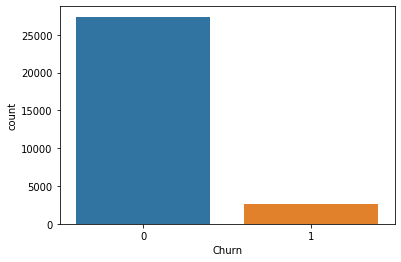

In [23]:
sns.countplot(df.Churn)

In [24]:
# def ismissing():
#     for i in range(6,10):
#         print(i)
#         count2 = 'count_rech_2g_{}'.format(str(i))
#         count3 = 'count_rech_3g_{}'.format(str(i))
#         date = 'date_of_last_rech_data_{}'.format(str(i))
#         avg = 'av_rech_amt_data_{}'.format(str(i))
#         total = 'total_rech_data_{}'.format(str(i))
        
#         print(df[count2].isnull().sum())
#         print(df[count3].isnull().sum())
#         print(df[date].isnull().sum())
#         print(df[avg].isnull().sum())
#         print(df[total].isnull().sum())